In [8]:
# import libraries
import os
import pandas as pd
import pandas_profiling
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from catboost import CatBoostClassifier , CatBoostRegressor, Pool, cv# Or CatBoostRegressor
from sklearn.metrics import mean_squared_error

%matplotlib inline

In [9]:
# Read input data
df = pd.read_csv('../bank_marketing_campaign/input/bank-full.csv', sep=";")
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [10]:
df.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no


# Data Profile

In [11]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [41]:
#df.profile_report()

In [13]:
df['default'].value_counts()

no     44396
yes      815
Name: default, dtype: int64

In [14]:
df['housing'].value_counts()

yes    25130
no     20081
Name: housing, dtype: int64

In [15]:
df['loan'].value_counts()

no     37967
yes     7244
Name: loan, dtype: int64

In [18]:
df['marital'].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [19]:
df['poutcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [17]:
df['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [19]:
df.loc[:,'day']=df['day'].astype(str)

In [42]:
#df['day'].value_counts()

# EDA

## Categorical variables

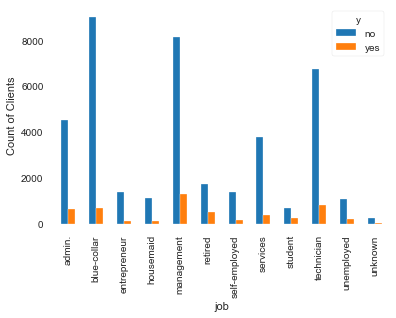

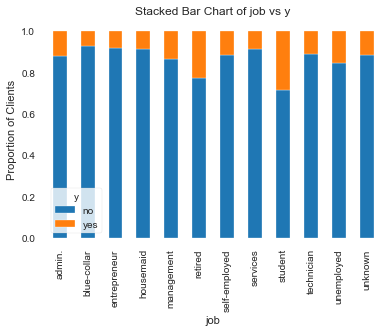

In [18]:
# Job vs y target
pd.crosstab(df.job,df.y).plot(kind='bar')
plt.xlabel('job')
plt.ylabel('Count of Clients')
plt.savefig('job')

table=pd.crosstab(df.job,df.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of job vs y')
plt.xlabel('job')
plt.ylabel('Proportion of Clients')
plt.savefig('job')

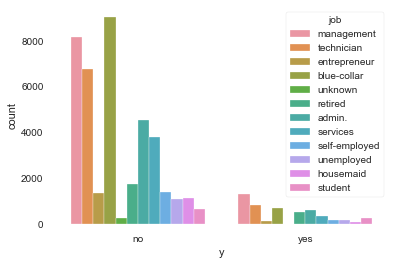

In [16]:
sns.countplot(x='y',hue='job',data=df)

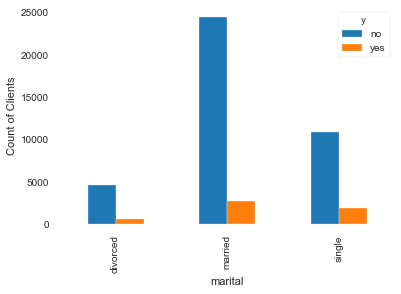

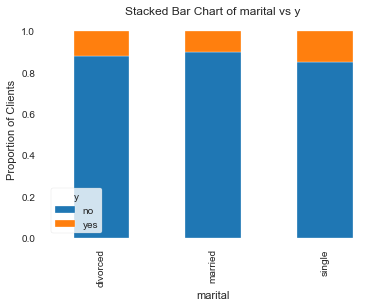

In [21]:
# marital vs y target
pd.crosstab(df.marital,df.y).plot(kind='bar')
plt.xlabel('marital')
plt.ylabel('Count of Clients')
plt.savefig('marital')

table=pd.crosstab(df.marital,df.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of marital vs y')
plt.xlabel('marital')
plt.ylabel('Proportion of Clients')
plt.savefig('marital')

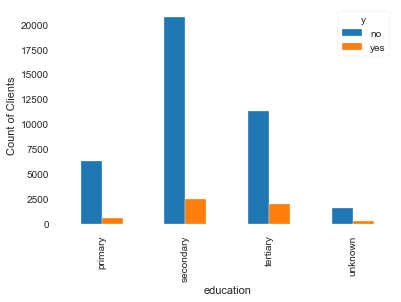

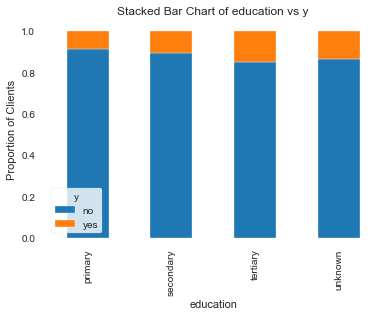

In [22]:
# education vs y target
pd.crosstab(df.education,df.y).plot(kind='bar')
plt.xlabel('education')
plt.ylabel('Count of Clients')
plt.savefig('education')

table=pd.crosstab(df.education,df.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of education vs y')
plt.xlabel('education')
plt.ylabel('Proportion of Clients')
plt.savefig('education')

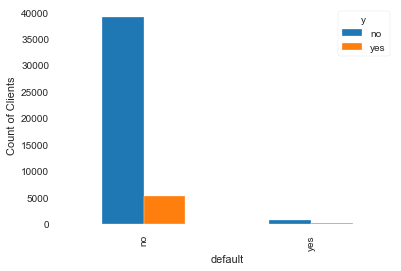

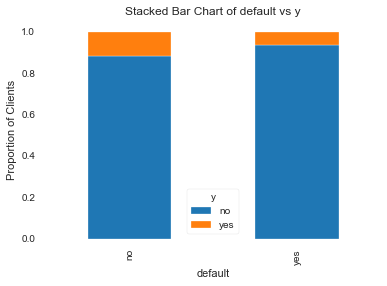

In [23]:
# default vs y target
pd.crosstab(df.default,df.y).plot(kind='bar')
plt.xlabel('default')
plt.ylabel('Count of Clients')
plt.savefig('default')

table=pd.crosstab(df.default,df.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of default vs y')
plt.xlabel('default')
plt.ylabel('Proportion of Clients')
plt.savefig('default')

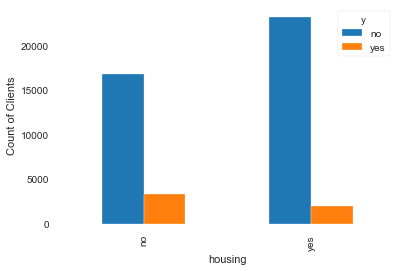

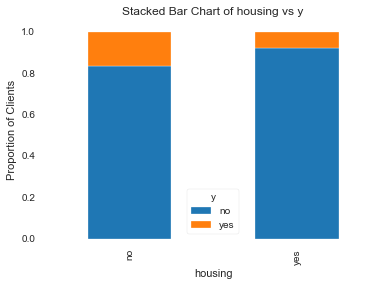

In [24]:
# housing vs y target
pd.crosstab(df.housing,df.y).plot(kind='bar')
plt.xlabel('housing')
plt.ylabel('Count of Clients')
plt.savefig('housing')

table=pd.crosstab(df.housing,df.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of housing vs y')
plt.xlabel('housing')
plt.ylabel('Proportion of Clients')
plt.savefig('housing')

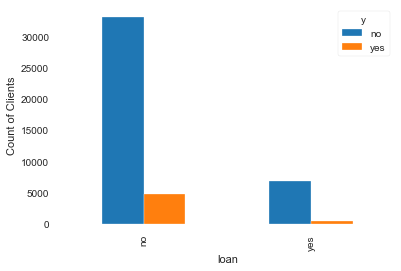

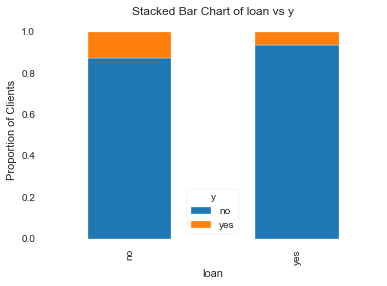

In [25]:
# loan
pd.crosstab(df.loan,df.y).plot(kind='bar')
plt.xlabel('loan')
plt.ylabel('Count of Clients')
plt.savefig('loan')

table=pd.crosstab(df.loan,df.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of loan vs y')
plt.xlabel('loan')
plt.ylabel('Proportion of Clients')
plt.savefig('loan')

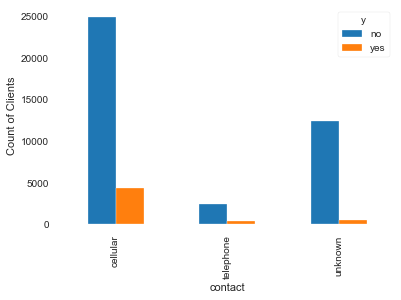

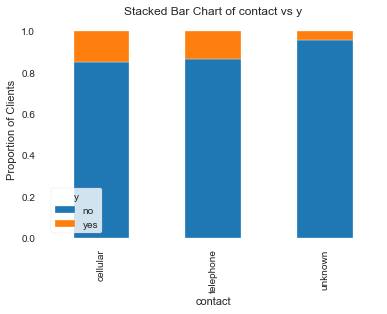

In [26]:
# contact
pd.crosstab(df.contact,df.y).plot(kind='bar')
plt.xlabel('contact')
plt.ylabel('Count of Clients')
plt.savefig('contact')

table=pd.crosstab(df.contact,df.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of contact vs y')
plt.xlabel('contact')
plt.ylabel('Proportion of Clients')
plt.savefig('contact')

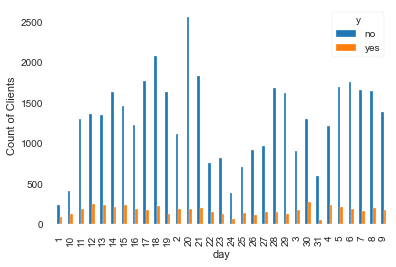

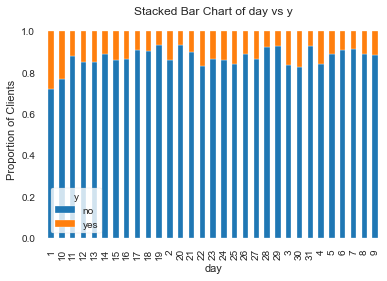

In [27]:
# day
pd.crosstab(df.day,df.y).plot(kind='bar')
plt.xlabel('day')
plt.ylabel('Count of Clients')
plt.savefig('day')

table=pd.crosstab(df.day,df.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of day vs y')
plt.xlabel('day')
plt.ylabel('Proportion of Clients')
plt.savefig('day')

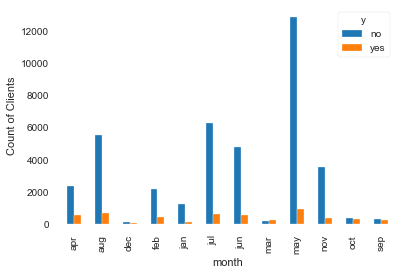

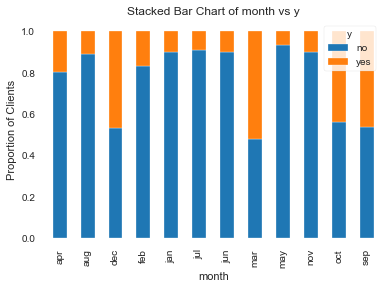

In [28]:
# month
pd.crosstab(df.month,df.y).plot(kind='bar')
plt.xlabel('month')
plt.ylabel('Count of Clients')
plt.savefig('month')

table=pd.crosstab(df.month,df.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of month vs y')
plt.xlabel('month')
plt.ylabel('Proportion of Clients')
plt.savefig('month')

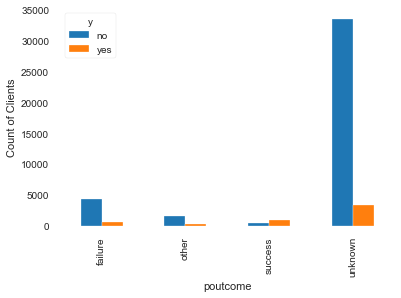

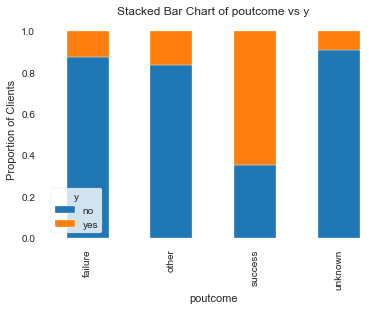

In [29]:
# poutcome
pd.crosstab(df.poutcome,df.y).plot(kind='bar')
plt.xlabel('poutcome')
plt.ylabel('Count of Clients')
plt.savefig('poutcome')

table=pd.crosstab(df.poutcome,df.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of poutcome vs y')
plt.xlabel('poutcome')
plt.ylabel('Proportion of Clients')
plt.savefig('poutcome')

## Numerical Variables

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

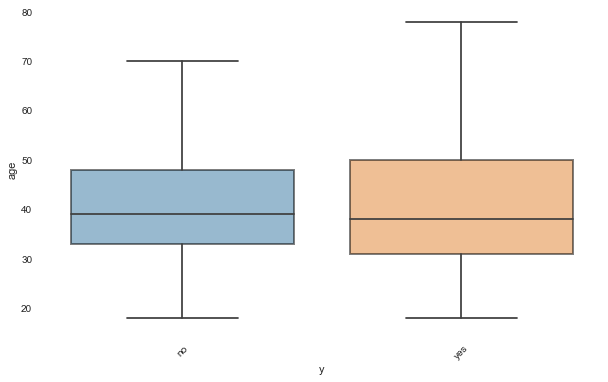

In [31]:
# Age
plt.figure(figsize = (10, 6))
ax = sns.boxplot(x='y', y='age', data=df, showfliers=False)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

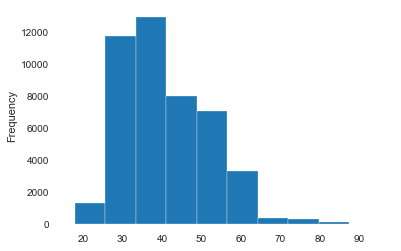

In [40]:
df['age'].plot.hist()

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

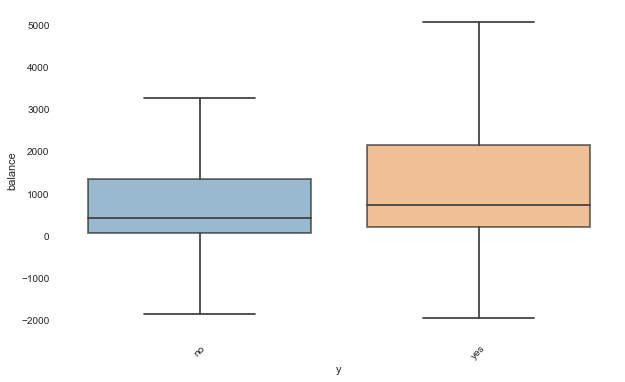

In [32]:
# balance
plt.figure(figsize = (10, 6))
ax = sns.boxplot(x='y', y='balance', data=df, showfliers=False)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

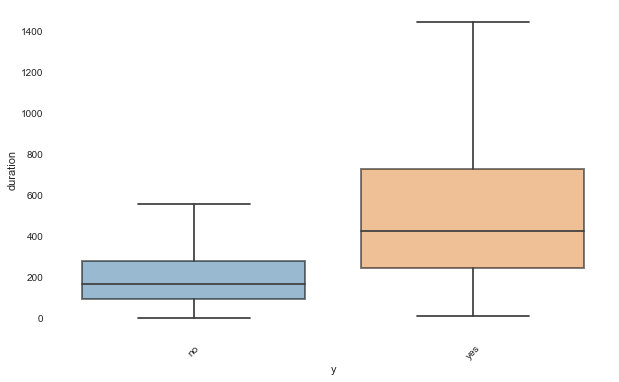

In [34]:
# duration
plt.figure(figsize = (10, 6))
ax = sns.boxplot(x='y', y='duration', data=df, showfliers=False)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

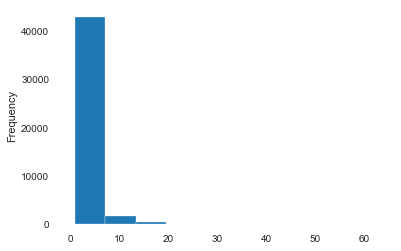

In [39]:
# campaign
df['campaign'].plot.hist()

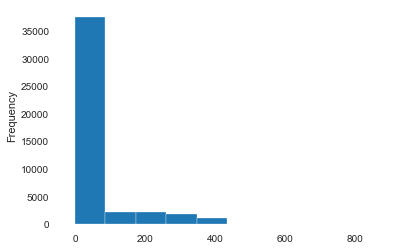

In [36]:
# pdays
df['pdays'].plot.hist()

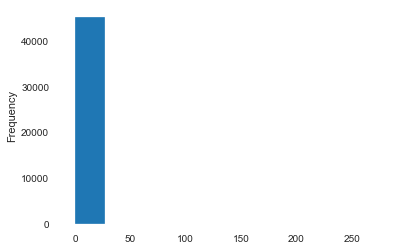

In [38]:
# previous
df['previous'].plot.hist()

# Predictive modelling using CatBoost & Model Validation

In [29]:
def get_dummy_from_bool(row, column_name):
    ''' Returns 0 if value in column_name is no, returns 1 if value in column_name is yes'''
    return 1 if row[column_name] == 'yes' else 0

bool_columns = ['default', 'housing', 'loan', 'y']

for bool_col in bool_columns:
    df[bool_col + '_bool'] = df.apply(lambda row: get_dummy_from_bool(row, bool_col),axis=1)
    
cleaned_df = df.drop(columns = bool_columns)

cleaned_df.head(2)

,age,job,marital,education,balance,contact,day,month,duration,campaign,pdays,previous,poutcome,default_bool,housing_bool,loan_bool,y_bool
0,58,management,married,tertiary,2143,unknown,5,may,261,1,-1,0,unknown,0,1,0,0
1,44,technician,single,secondary,29,unknown,5,may,151,1,-1,0,unknown,0,1,0,0


In [32]:
X.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,default_bool,housing_bool,loan_bool
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,0,1,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,0,1,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,0,1,1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,0,1,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,0,0,0


In [37]:
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier


X = cleaned_df[[c for c in cleaned_df if c not in ['y_bool']]]
y = cleaned_df[['y_bool']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

#train_x,test_x, train_y, test_y = train_test_split(X_train, y_train, test_size=0.2, random_state=123)
nominal_features = ['job', 'marital', 'education', 'contact','month', 'poutcome']

model = CatBoostClassifier(  learning_rate=0.03, n_estimators=5000,
                          l2_leaf_reg=5,
                          cat_features = nominal_features)

In [38]:
model.fit(X_train, y_train, cat_features=nominal_features)
# Get predicted classes
preds_class = model.predict(X_test)
# Get predicted probabilities for each class
preds_proba = model.predict_proba(X_test)

0:	learn: 0.6545943	total: 218ms	remaining: 18m 12s
1:	learn: 0.6252087	total: 342ms	remaining: 14m 13s
2:	learn: 0.5932625	total: 425ms	remaining: 11m 48s
3:	learn: 0.5638852	total: 521ms	remaining: 10m 50s
4:	learn: 0.5388837	total: 645ms	remaining: 10m 44s
5:	learn: 0.5160004	total: 731ms	remaining: 10m 8s
6:	learn: 0.4978573	total: 842ms	remaining: 10m
7:	learn: 0.4769204	total: 934ms	remaining: 9m 42s
8:	learn: 0.4618024	total: 981ms	remaining: 9m 4s
9:	learn: 0.4457519	total: 1.05s	remaining: 8m 46s
10:	learn: 0.4324400	total: 1.14s	remaining: 8m 36s
11:	learn: 0.4176780	total: 1.21s	remaining: 8m 24s
12:	learn: 0.4043598	total: 1.3s	remaining: 8m 19s
13:	learn: 0.3930600	total: 1.36s	remaining: 8m 3s
14:	learn: 0.3820120	total: 1.46s	remaining: 8m 4s
15:	learn: 0.3708293	total: 1.58s	remaining: 8m 11s
16:	learn: 0.3617231	total: 1.66s	remaining: 8m 7s
17:	learn: 0.3539333	total: 1.73s	remaining: 7m 58s
18:	learn: 0.3459058	total: 1.83s	remaining: 8m
19:	learn: 0.3377929	total: 1

160:	learn: 0.2015442	total: 13.8s	remaining: 6m 54s
161:	learn: 0.2014925	total: 13.9s	remaining: 6m 53s
162:	learn: 0.2013967	total: 13.9s	remaining: 6m 52s
163:	learn: 0.2012941	total: 14s	remaining: 6m 52s
164:	learn: 0.2011984	total: 14.1s	remaining: 6m 51s
165:	learn: 0.2010944	total: 14.1s	remaining: 6m 51s
166:	learn: 0.2010053	total: 14.2s	remaining: 6m 51s
167:	learn: 0.2008984	total: 14.3s	remaining: 6m 50s
168:	learn: 0.2008633	total: 14.3s	remaining: 6m 50s
169:	learn: 0.2007869	total: 14.4s	remaining: 6m 49s
170:	learn: 0.2007808	total: 14.4s	remaining: 6m 47s
171:	learn: 0.2007360	total: 14.5s	remaining: 6m 47s
172:	learn: 0.2006620	total: 14.6s	remaining: 6m 47s
173:	learn: 0.2004733	total: 14.7s	remaining: 6m 48s
174:	learn: 0.2004293	total: 14.8s	remaining: 6m 47s
175:	learn: 0.2004101	total: 14.9s	remaining: 6m 47s
176:	learn: 0.2003627	total: 15s	remaining: 6m 47s
177:	learn: 0.2001151	total: 15s	remaining: 6m 47s
178:	learn: 0.1999297	total: 15.1s	remaining: 6m 46s

318:	learn: 0.1907052	total: 26.3s	remaining: 6m 26s
319:	learn: 0.1906914	total: 26.4s	remaining: 6m 25s
320:	learn: 0.1906065	total: 26.5s	remaining: 6m 25s
321:	learn: 0.1904280	total: 26.6s	remaining: 6m 25s
322:	learn: 0.1903819	total: 26.7s	remaining: 6m 26s
323:	learn: 0.1903388	total: 26.8s	remaining: 6m 26s
324:	learn: 0.1902968	total: 26.8s	remaining: 6m 26s
325:	learn: 0.1902273	total: 26.9s	remaining: 6m 26s
326:	learn: 0.1901655	total: 27s	remaining: 6m 26s
327:	learn: 0.1901525	total: 27.1s	remaining: 6m 26s
328:	learn: 0.1901382	total: 27.2s	remaining: 6m 25s
329:	learn: 0.1900926	total: 27.3s	remaining: 6m 25s
330:	learn: 0.1900576	total: 27.4s	remaining: 6m 25s
331:	learn: 0.1900489	total: 27.5s	remaining: 6m 26s
332:	learn: 0.1900170	total: 27.6s	remaining: 6m 26s
333:	learn: 0.1900169	total: 27.6s	remaining: 6m 25s
334:	learn: 0.1899655	total: 27.7s	remaining: 6m 25s
335:	learn: 0.1899257	total: 27.8s	remaining: 6m 25s
336:	learn: 0.1898770	total: 27.9s	remaining: 6m

476:	learn: 0.1842119	total: 39.2s	remaining: 6m 11s
477:	learn: 0.1841960	total: 39.3s	remaining: 6m 11s
478:	learn: 0.1841419	total: 39.4s	remaining: 6m 11s
479:	learn: 0.1840911	total: 39.5s	remaining: 6m 12s
480:	learn: 0.1840660	total: 39.6s	remaining: 6m 12s
481:	learn: 0.1840446	total: 39.7s	remaining: 6m 12s
482:	learn: 0.1840062	total: 39.8s	remaining: 6m 12s
483:	learn: 0.1839714	total: 39.9s	remaining: 6m 12s
484:	learn: 0.1839645	total: 40s	remaining: 6m 12s
485:	learn: 0.1839187	total: 40.1s	remaining: 6m 12s
486:	learn: 0.1838681	total: 40.2s	remaining: 6m 12s
487:	learn: 0.1838490	total: 40.2s	remaining: 6m 12s
488:	learn: 0.1838177	total: 40.3s	remaining: 6m 12s
489:	learn: 0.1837881	total: 40.4s	remaining: 6m 11s
490:	learn: 0.1837753	total: 40.5s	remaining: 6m 12s
491:	learn: 0.1837739	total: 40.6s	remaining: 6m 12s
492:	learn: 0.1837129	total: 40.7s	remaining: 6m 12s
493:	learn: 0.1836705	total: 40.8s	remaining: 6m 11s
494:	learn: 0.1836553	total: 40.9s	remaining: 6m

634:	learn: 0.1791380	total: 52.9s	remaining: 6m 3s
635:	learn: 0.1791165	total: 53s	remaining: 6m 3s
636:	learn: 0.1790961	total: 53.1s	remaining: 6m 3s
637:	learn: 0.1790951	total: 53.2s	remaining: 6m 3s
638:	learn: 0.1790425	total: 53.3s	remaining: 6m 3s
639:	learn: 0.1790409	total: 53.4s	remaining: 6m 3s
640:	learn: 0.1790320	total: 53.5s	remaining: 6m 3s
641:	learn: 0.1789776	total: 53.5s	remaining: 6m 3s
642:	learn: 0.1789661	total: 53.6s	remaining: 6m 3s
643:	learn: 0.1789313	total: 53.7s	remaining: 6m 3s
644:	learn: 0.1789303	total: 53.8s	remaining: 6m 2s
645:	learn: 0.1788975	total: 53.8s	remaining: 6m 2s
646:	learn: 0.1788622	total: 53.9s	remaining: 6m 2s
647:	learn: 0.1788400	total: 54s	remaining: 6m 2s
648:	learn: 0.1788302	total: 54.1s	remaining: 6m 2s
649:	learn: 0.1788134	total: 54.2s	remaining: 6m 2s
650:	learn: 0.1788021	total: 54.3s	remaining: 6m 2s
651:	learn: 0.1787672	total: 54.4s	remaining: 6m 2s
652:	learn: 0.1787211	total: 54.5s	remaining: 6m 2s
653:	learn: 0.17

793:	learn: 0.1750710	total: 1m 7s	remaining: 5m 57s
794:	learn: 0.1750560	total: 1m 7s	remaining: 5m 57s
795:	learn: 0.1750304	total: 1m 7s	remaining: 5m 57s
796:	learn: 0.1750092	total: 1m 7s	remaining: 5m 57s
797:	learn: 0.1749685	total: 1m 7s	remaining: 5m 57s
798:	learn: 0.1749486	total: 1m 7s	remaining: 5m 57s
799:	learn: 0.1749481	total: 1m 8s	remaining: 5m 57s
800:	learn: 0.1749015	total: 1m 8s	remaining: 5m 57s
801:	learn: 0.1748909	total: 1m 8s	remaining: 5m 57s
802:	learn: 0.1748278	total: 1m 8s	remaining: 5m 57s
803:	learn: 0.1748115	total: 1m 8s	remaining: 5m 57s
804:	learn: 0.1747780	total: 1m 8s	remaining: 5m 57s
805:	learn: 0.1747609	total: 1m 8s	remaining: 5m 57s
806:	learn: 0.1746993	total: 1m 8s	remaining: 5m 57s
807:	learn: 0.1746687	total: 1m 8s	remaining: 5m 57s
808:	learn: 0.1746302	total: 1m 9s	remaining: 5m 57s
809:	learn: 0.1746130	total: 1m 9s	remaining: 5m 57s
810:	learn: 0.1745791	total: 1m 9s	remaining: 5m 57s
811:	learn: 0.1745378	total: 1m 9s	remaining: 

946:	learn: 0.1708282	total: 1m 21s	remaining: 5m 50s
947:	learn: 0.1707696	total: 1m 21s	remaining: 5m 50s
948:	learn: 0.1707596	total: 1m 21s	remaining: 5m 50s
949:	learn: 0.1707416	total: 1m 22s	remaining: 5m 49s
950:	learn: 0.1707321	total: 1m 22s	remaining: 5m 49s
951:	learn: 0.1707295	total: 1m 22s	remaining: 5m 49s
952:	learn: 0.1707061	total: 1m 22s	remaining: 5m 49s
953:	learn: 0.1706717	total: 1m 22s	remaining: 5m 49s
954:	learn: 0.1706401	total: 1m 22s	remaining: 5m 49s
955:	learn: 0.1706283	total: 1m 22s	remaining: 5m 49s
956:	learn: 0.1706157	total: 1m 22s	remaining: 5m 49s
957:	learn: 0.1705934	total: 1m 22s	remaining: 5m 49s
958:	learn: 0.1705671	total: 1m 22s	remaining: 5m 49s
959:	learn: 0.1705163	total: 1m 23s	remaining: 5m 49s
960:	learn: 0.1704937	total: 1m 23s	remaining: 5m 49s
961:	learn: 0.1704485	total: 1m 23s	remaining: 5m 49s
962:	learn: 0.1704480	total: 1m 23s	remaining: 5m 49s
963:	learn: 0.1704190	total: 1m 23s	remaining: 5m 49s
964:	learn: 0.1703917	total:

1096:	learn: 0.1671612	total: 1m 36s	remaining: 5m 42s
1097:	learn: 0.1671060	total: 1m 36s	remaining: 5m 41s
1098:	learn: 0.1670959	total: 1m 36s	remaining: 5m 41s
1099:	learn: 0.1670747	total: 1m 36s	remaining: 5m 41s
1100:	learn: 0.1670608	total: 1m 36s	remaining: 5m 41s
1101:	learn: 0.1670180	total: 1m 36s	remaining: 5m 41s
1102:	learn: 0.1669792	total: 1m 36s	remaining: 5m 41s
1103:	learn: 0.1669375	total: 1m 36s	remaining: 5m 41s
1104:	learn: 0.1669173	total: 1m 36s	remaining: 5m 41s
1105:	learn: 0.1668607	total: 1m 36s	remaining: 5m 41s
1106:	learn: 0.1668457	total: 1m 37s	remaining: 5m 41s
1107:	learn: 0.1668372	total: 1m 37s	remaining: 5m 41s
1108:	learn: 0.1667860	total: 1m 37s	remaining: 5m 41s
1109:	learn: 0.1667342	total: 1m 37s	remaining: 5m 41s
1110:	learn: 0.1667092	total: 1m 37s	remaining: 5m 41s
1111:	learn: 0.1666965	total: 1m 37s	remaining: 5m 41s
1112:	learn: 0.1666531	total: 1m 37s	remaining: 5m 41s
1113:	learn: 0.1666431	total: 1m 37s	remaining: 5m 40s
1114:	lear

1246:	learn: 0.1637999	total: 1m 50s	remaining: 5m 31s
1247:	learn: 0.1637854	total: 1m 50s	remaining: 5m 31s
1248:	learn: 0.1637672	total: 1m 50s	remaining: 5m 31s
1249:	learn: 0.1637468	total: 1m 50s	remaining: 5m 31s
1250:	learn: 0.1637456	total: 1m 50s	remaining: 5m 31s
1251:	learn: 0.1637264	total: 1m 50s	remaining: 5m 31s
1252:	learn: 0.1637135	total: 1m 50s	remaining: 5m 31s
1253:	learn: 0.1636806	total: 1m 50s	remaining: 5m 31s
1254:	learn: 0.1636647	total: 1m 51s	remaining: 5m 31s
1255:	learn: 0.1636507	total: 1m 51s	remaining: 5m 31s
1256:	learn: 0.1636111	total: 1m 51s	remaining: 5m 31s
1257:	learn: 0.1635700	total: 1m 51s	remaining: 5m 31s
1258:	learn: 0.1635610	total: 1m 51s	remaining: 5m 31s
1259:	learn: 0.1635585	total: 1m 51s	remaining: 5m 31s
1260:	learn: 0.1635314	total: 1m 51s	remaining: 5m 31s
1261:	learn: 0.1635259	total: 1m 51s	remaining: 5m 30s
1262:	learn: 0.1635032	total: 1m 51s	remaining: 5m 30s
1263:	learn: 0.1634708	total: 1m 51s	remaining: 5m 30s
1264:	lear

1397:	learn: 0.1606465	total: 2m 5s	remaining: 5m 22s
1398:	learn: 0.1606216	total: 2m 5s	remaining: 5m 22s
1399:	learn: 0.1606067	total: 2m 5s	remaining: 5m 22s
1400:	learn: 0.1605899	total: 2m 5s	remaining: 5m 22s
1401:	learn: 0.1605554	total: 2m 5s	remaining: 5m 22s
1402:	learn: 0.1605447	total: 2m 5s	remaining: 5m 22s
1403:	learn: 0.1605350	total: 2m 5s	remaining: 5m 22s
1404:	learn: 0.1605114	total: 2m 5s	remaining: 5m 22s
1405:	learn: 0.1604776	total: 2m 6s	remaining: 5m 22s
1406:	learn: 0.1604774	total: 2m 6s	remaining: 5m 22s
1407:	learn: 0.1604413	total: 2m 6s	remaining: 5m 21s
1408:	learn: 0.1604244	total: 2m 6s	remaining: 5m 21s
1409:	learn: 0.1604172	total: 2m 6s	remaining: 5m 21s
1410:	learn: 0.1603813	total: 2m 6s	remaining: 5m 21s
1411:	learn: 0.1603775	total: 2m 6s	remaining: 5m 21s
1412:	learn: 0.1603773	total: 2m 6s	remaining: 5m 21s
1413:	learn: 0.1603491	total: 2m 6s	remaining: 5m 21s
1414:	learn: 0.1603361	total: 2m 6s	remaining: 5m 21s
1415:	learn: 0.1603313	total

1549:	learn: 0.1579014	total: 2m 19s	remaining: 5m 10s
1550:	learn: 0.1578717	total: 2m 19s	remaining: 5m 9s
1551:	learn: 0.1578572	total: 2m 19s	remaining: 5m 9s
1552:	learn: 0.1578134	total: 2m 19s	remaining: 5m 9s
1553:	learn: 0.1577822	total: 2m 19s	remaining: 5m 9s
1554:	learn: 0.1577496	total: 2m 19s	remaining: 5m 9s
1555:	learn: 0.1577361	total: 2m 19s	remaining: 5m 9s
1556:	learn: 0.1577241	total: 2m 19s	remaining: 5m 9s
1557:	learn: 0.1577214	total: 2m 20s	remaining: 5m 9s
1558:	learn: 0.1576983	total: 2m 20s	remaining: 5m 9s
1559:	learn: 0.1576731	total: 2m 20s	remaining: 5m 9s
1560:	learn: 0.1576594	total: 2m 20s	remaining: 5m 8s
1561:	learn: 0.1576568	total: 2m 20s	remaining: 5m 8s
1562:	learn: 0.1576292	total: 2m 20s	remaining: 5m 8s
1563:	learn: 0.1576219	total: 2m 20s	remaining: 5m 8s
1564:	learn: 0.1576003	total: 2m 20s	remaining: 5m 8s
1565:	learn: 0.1575772	total: 2m 20s	remaining: 5m 8s
1566:	learn: 0.1575484	total: 2m 20s	remaining: 5m 8s
1567:	learn: 0.1575450	tota

1702:	learn: 0.1549265	total: 2m 33s	remaining: 4m 56s
1703:	learn: 0.1549188	total: 2m 33s	remaining: 4m 56s
1704:	learn: 0.1549165	total: 2m 33s	remaining: 4m 56s
1705:	learn: 0.1549065	total: 2m 33s	remaining: 4m 56s
1706:	learn: 0.1548893	total: 2m 33s	remaining: 4m 56s
1707:	learn: 0.1548674	total: 2m 33s	remaining: 4m 56s
1708:	learn: 0.1548082	total: 2m 33s	remaining: 4m 56s
1709:	learn: 0.1547991	total: 2m 34s	remaining: 4m 56s
1710:	learn: 0.1547802	total: 2m 34s	remaining: 4m 56s
1711:	learn: 0.1547623	total: 2m 34s	remaining: 4m 56s
1712:	learn: 0.1547512	total: 2m 34s	remaining: 4m 56s
1713:	learn: 0.1547285	total: 2m 34s	remaining: 4m 55s
1714:	learn: 0.1547131	total: 2m 34s	remaining: 4m 55s
1715:	learn: 0.1547044	total: 2m 34s	remaining: 4m 55s
1716:	learn: 0.1546716	total: 2m 34s	remaining: 4m 55s
1717:	learn: 0.1546687	total: 2m 34s	remaining: 4m 55s
1718:	learn: 0.1546475	total: 2m 34s	remaining: 4m 55s
1719:	learn: 0.1546388	total: 2m 34s	remaining: 4m 55s
1720:	lear

1853:	learn: 0.1524115	total: 2m 47s	remaining: 4m 43s
1854:	learn: 0.1523792	total: 2m 47s	remaining: 4m 43s
1855:	learn: 0.1523494	total: 2m 47s	remaining: 4m 43s
1856:	learn: 0.1523294	total: 2m 47s	remaining: 4m 43s
1857:	learn: 0.1523072	total: 2m 47s	remaining: 4m 43s
1858:	learn: 0.1523017	total: 2m 47s	remaining: 4m 43s
1859:	learn: 0.1522917	total: 2m 47s	remaining: 4m 43s
1860:	learn: 0.1522730	total: 2m 47s	remaining: 4m 43s
1861:	learn: 0.1522574	total: 2m 48s	remaining: 4m 43s
1862:	learn: 0.1522333	total: 2m 48s	remaining: 4m 43s
1863:	learn: 0.1522227	total: 2m 48s	remaining: 4m 43s
1864:	learn: 0.1521966	total: 2m 48s	remaining: 4m 43s
1865:	learn: 0.1521513	total: 2m 48s	remaining: 4m 43s
1866:	learn: 0.1521362	total: 2m 48s	remaining: 4m 42s
1867:	learn: 0.1521198	total: 2m 48s	remaining: 4m 42s
1868:	learn: 0.1521087	total: 2m 48s	remaining: 4m 42s
1869:	learn: 0.1520974	total: 2m 48s	remaining: 4m 42s
1870:	learn: 0.1520724	total: 2m 49s	remaining: 4m 42s
1871:	lear

2003:	learn: 0.1501718	total: 3m 1s	remaining: 4m 31s
2004:	learn: 0.1501679	total: 3m 1s	remaining: 4m 31s
2005:	learn: 0.1501583	total: 3m 2s	remaining: 4m 31s
2006:	learn: 0.1501429	total: 3m 2s	remaining: 4m 31s
2007:	learn: 0.1501352	total: 3m 2s	remaining: 4m 31s
2008:	learn: 0.1501268	total: 3m 2s	remaining: 4m 31s
2009:	learn: 0.1501109	total: 3m 2s	remaining: 4m 31s
2010:	learn: 0.1500988	total: 3m 2s	remaining: 4m 31s
2011:	learn: 0.1500849	total: 3m 2s	remaining: 4m 31s
2012:	learn: 0.1500794	total: 3m 2s	remaining: 4m 31s
2013:	learn: 0.1500694	total: 3m 2s	remaining: 4m 31s
2014:	learn: 0.1500315	total: 3m 2s	remaining: 4m 30s
2015:	learn: 0.1500299	total: 3m 3s	remaining: 4m 30s
2016:	learn: 0.1500252	total: 3m 3s	remaining: 4m 30s
2017:	learn: 0.1500101	total: 3m 3s	remaining: 4m 30s
2018:	learn: 0.1500003	total: 3m 3s	remaining: 4m 30s
2019:	learn: 0.1499681	total: 3m 3s	remaining: 4m 30s
2020:	learn: 0.1499631	total: 3m 3s	remaining: 4m 30s
2021:	learn: 0.1499520	total

2156:	learn: 0.1479119	total: 3m 16s	remaining: 4m 18s
2157:	learn: 0.1479021	total: 3m 16s	remaining: 4m 18s
2158:	learn: 0.1478852	total: 3m 16s	remaining: 4m 18s
2159:	learn: 0.1478504	total: 3m 16s	remaining: 4m 18s
2160:	learn: 0.1478277	total: 3m 16s	remaining: 4m 18s
2161:	learn: 0.1478071	total: 3m 16s	remaining: 4m 18s
2162:	learn: 0.1477943	total: 3m 16s	remaining: 4m 18s
2163:	learn: 0.1477889	total: 3m 16s	remaining: 4m 18s
2164:	learn: 0.1477600	total: 3m 17s	remaining: 4m 18s
2165:	learn: 0.1477567	total: 3m 17s	remaining: 4m 17s
2166:	learn: 0.1477498	total: 3m 17s	remaining: 4m 17s
2167:	learn: 0.1477386	total: 3m 17s	remaining: 4m 17s
2168:	learn: 0.1477299	total: 3m 17s	remaining: 4m 17s
2169:	learn: 0.1476958	total: 3m 17s	remaining: 4m 17s
2170:	learn: 0.1476904	total: 3m 17s	remaining: 4m 17s
2171:	learn: 0.1476728	total: 3m 17s	remaining: 4m 17s
2172:	learn: 0.1476475	total: 3m 17s	remaining: 4m 17s
2173:	learn: 0.1476116	total: 3m 18s	remaining: 4m 17s
2174:	lear

2308:	learn: 0.1455000	total: 3m 30s	remaining: 4m 5s
2309:	learn: 0.1454856	total: 3m 30s	remaining: 4m 5s
2310:	learn: 0.1454777	total: 3m 30s	remaining: 4m 5s
2311:	learn: 0.1454678	total: 3m 31s	remaining: 4m 5s
2312:	learn: 0.1454512	total: 3m 31s	remaining: 4m 5s
2313:	learn: 0.1454509	total: 3m 31s	remaining: 4m 5s
2314:	learn: 0.1454297	total: 3m 31s	remaining: 4m 5s
2315:	learn: 0.1454191	total: 3m 31s	remaining: 4m 4s
2316:	learn: 0.1454022	total: 3m 31s	remaining: 4m 4s
2317:	learn: 0.1453830	total: 3m 31s	remaining: 4m 4s
2318:	learn: 0.1453718	total: 3m 31s	remaining: 4m 4s
2319:	learn: 0.1453539	total: 3m 31s	remaining: 4m 4s
2320:	learn: 0.1453081	total: 3m 31s	remaining: 4m 4s
2321:	learn: 0.1452912	total: 3m 31s	remaining: 4m 4s
2322:	learn: 0.1452513	total: 3m 31s	remaining: 4m 4s
2323:	learn: 0.1452394	total: 3m 31s	remaining: 4m 4s
2324:	learn: 0.1452146	total: 3m 32s	remaining: 4m 4s
2325:	learn: 0.1452022	total: 3m 32s	remaining: 4m 3s
2326:	learn: 0.1451814	total

2460:	learn: 0.1432923	total: 3m 44s	remaining: 3m 52s
2461:	learn: 0.1432823	total: 3m 45s	remaining: 3m 52s
2462:	learn: 0.1432548	total: 3m 45s	remaining: 3m 51s
2463:	learn: 0.1432391	total: 3m 45s	remaining: 3m 51s
2464:	learn: 0.1432201	total: 3m 45s	remaining: 3m 51s
2465:	learn: 0.1432001	total: 3m 45s	remaining: 3m 51s
2466:	learn: 0.1431918	total: 3m 45s	remaining: 3m 51s
2467:	learn: 0.1431615	total: 3m 45s	remaining: 3m 51s
2468:	learn: 0.1431588	total: 3m 45s	remaining: 3m 51s
2469:	learn: 0.1431532	total: 3m 45s	remaining: 3m 51s
2470:	learn: 0.1431379	total: 3m 45s	remaining: 3m 51s
2471:	learn: 0.1431226	total: 3m 45s	remaining: 3m 51s
2472:	learn: 0.1431162	total: 3m 46s	remaining: 3m 50s
2473:	learn: 0.1431075	total: 3m 46s	remaining: 3m 50s
2474:	learn: 0.1430946	total: 3m 46s	remaining: 3m 50s
2475:	learn: 0.1430559	total: 3m 46s	remaining: 3m 50s
2476:	learn: 0.1430505	total: 3m 46s	remaining: 3m 50s
2477:	learn: 0.1430315	total: 3m 46s	remaining: 3m 50s
2478:	lear

2610:	learn: 0.1410742	total: 3m 58s	remaining: 3m 38s
2611:	learn: 0.1410571	total: 3m 59s	remaining: 3m 38s
2612:	learn: 0.1410242	total: 3m 59s	remaining: 3m 38s
2613:	learn: 0.1410241	total: 3m 59s	remaining: 3m 38s
2614:	learn: 0.1410126	total: 3m 59s	remaining: 3m 38s
2615:	learn: 0.1409828	total: 3m 59s	remaining: 3m 38s
2616:	learn: 0.1409479	total: 3m 59s	remaining: 3m 38s
2617:	learn: 0.1409341	total: 3m 59s	remaining: 3m 37s
2618:	learn: 0.1409227	total: 3m 59s	remaining: 3m 37s
2619:	learn: 0.1409202	total: 3m 59s	remaining: 3m 37s
2620:	learn: 0.1409145	total: 3m 59s	remaining: 3m 37s
2621:	learn: 0.1409084	total: 3m 59s	remaining: 3m 37s
2622:	learn: 0.1408979	total: 4m	remaining: 3m 37s
2623:	learn: 0.1408844	total: 4m	remaining: 3m 37s
2624:	learn: 0.1408687	total: 4m	remaining: 3m 37s
2625:	learn: 0.1408601	total: 4m	remaining: 3m 37s
2626:	learn: 0.1408511	total: 4m	remaining: 3m 37s
2627:	learn: 0.1408312	total: 4m	remaining: 3m 37s
2628:	learn: 0.1408197	total: 4m	r

2762:	learn: 0.1390843	total: 4m 13s	remaining: 3m 25s
2763:	learn: 0.1390761	total: 4m 13s	remaining: 3m 25s
2764:	learn: 0.1390696	total: 4m 14s	remaining: 3m 25s
2765:	learn: 0.1390651	total: 4m 14s	remaining: 3m 25s
2766:	learn: 0.1390591	total: 4m 14s	remaining: 3m 25s
2767:	learn: 0.1390590	total: 4m 14s	remaining: 3m 24s
2768:	learn: 0.1390590	total: 4m 14s	remaining: 3m 24s
2769:	learn: 0.1390460	total: 4m 14s	remaining: 3m 24s
2770:	learn: 0.1390400	total: 4m 14s	remaining: 3m 24s
2771:	learn: 0.1390361	total: 4m 14s	remaining: 3m 24s
2772:	learn: 0.1390321	total: 4m 14s	remaining: 3m 24s
2773:	learn: 0.1390241	total: 4m 14s	remaining: 3m 24s
2774:	learn: 0.1390131	total: 4m 14s	remaining: 3m 24s
2775:	learn: 0.1390072	total: 4m 14s	remaining: 3m 24s
2776:	learn: 0.1389949	total: 4m 14s	remaining: 3m 23s
2777:	learn: 0.1389878	total: 4m 14s	remaining: 3m 23s
2778:	learn: 0.1389821	total: 4m 14s	remaining: 3m 23s
2779:	learn: 0.1389696	total: 4m 14s	remaining: 3m 23s
2780:	lear

2911:	learn: 0.1372475	total: 4m 27s	remaining: 3m 11s
2912:	learn: 0.1372390	total: 4m 27s	remaining: 3m 11s
2913:	learn: 0.1372315	total: 4m 27s	remaining: 3m 11s
2914:	learn: 0.1372142	total: 4m 27s	remaining: 3m 11s
2915:	learn: 0.1371988	total: 4m 27s	remaining: 3m 11s
2916:	learn: 0.1371935	total: 4m 27s	remaining: 3m 11s
2917:	learn: 0.1371912	total: 4m 27s	remaining: 3m 10s
2918:	learn: 0.1371904	total: 4m 27s	remaining: 3m 10s
2919:	learn: 0.1371717	total: 4m 27s	remaining: 3m 10s
2920:	learn: 0.1371613	total: 4m 27s	remaining: 3m 10s
2921:	learn: 0.1371516	total: 4m 28s	remaining: 3m 10s
2922:	learn: 0.1371371	total: 4m 28s	remaining: 3m 10s
2923:	learn: 0.1371363	total: 4m 28s	remaining: 3m 10s
2924:	learn: 0.1371285	total: 4m 28s	remaining: 3m 10s
2925:	learn: 0.1371199	total: 4m 28s	remaining: 3m 10s
2926:	learn: 0.1371132	total: 4m 28s	remaining: 3m 10s
2927:	learn: 0.1370987	total: 4m 28s	remaining: 3m 10s
2928:	learn: 0.1370691	total: 4m 28s	remaining: 3m 10s
2929:	lear

3064:	learn: 0.1352556	total: 4m 41s	remaining: 2m 57s
3065:	learn: 0.1352265	total: 4m 41s	remaining: 2m 57s
3066:	learn: 0.1352201	total: 4m 41s	remaining: 2m 57s
3067:	learn: 0.1352122	total: 4m 42s	remaining: 2m 57s
3068:	learn: 0.1352050	total: 4m 42s	remaining: 2m 57s
3069:	learn: 0.1351910	total: 4m 42s	remaining: 2m 57s
3070:	learn: 0.1351796	total: 4m 42s	remaining: 2m 57s
3071:	learn: 0.1351702	total: 4m 42s	remaining: 2m 57s
3072:	learn: 0.1351655	total: 4m 42s	remaining: 2m 57s
3073:	learn: 0.1351627	total: 4m 42s	remaining: 2m 57s
3074:	learn: 0.1351560	total: 4m 42s	remaining: 2m 56s
3075:	learn: 0.1351434	total: 4m 42s	remaining: 2m 56s
3076:	learn: 0.1351330	total: 4m 42s	remaining: 2m 56s
3077:	learn: 0.1351178	total: 4m 42s	remaining: 2m 56s
3078:	learn: 0.1351080	total: 4m 42s	remaining: 2m 56s
3079:	learn: 0.1350934	total: 4m 43s	remaining: 2m 56s
3080:	learn: 0.1350778	total: 4m 43s	remaining: 2m 56s
3081:	learn: 0.1350757	total: 4m 43s	remaining: 2m 56s
3082:	lear

3214:	learn: 0.1333455	total: 4m 55s	remaining: 2m 44s
3215:	learn: 0.1333371	total: 4m 55s	remaining: 2m 43s
3216:	learn: 0.1333290	total: 4m 55s	remaining: 2m 43s
3217:	learn: 0.1333230	total: 4m 55s	remaining: 2m 43s
3218:	learn: 0.1333085	total: 4m 55s	remaining: 2m 43s
3219:	learn: 0.1332970	total: 4m 56s	remaining: 2m 43s
3220:	learn: 0.1332881	total: 4m 56s	remaining: 2m 43s
3221:	learn: 0.1332540	total: 4m 56s	remaining: 2m 43s
3222:	learn: 0.1332415	total: 4m 56s	remaining: 2m 43s
3223:	learn: 0.1332289	total: 4m 56s	remaining: 2m 43s
3224:	learn: 0.1332209	total: 4m 56s	remaining: 2m 43s
3225:	learn: 0.1332136	total: 4m 56s	remaining: 2m 43s
3226:	learn: 0.1331895	total: 4m 56s	remaining: 2m 43s
3227:	learn: 0.1331719	total: 4m 56s	remaining: 2m 42s
3228:	learn: 0.1331703	total: 4m 56s	remaining: 2m 42s
3229:	learn: 0.1331653	total: 4m 57s	remaining: 2m 42s
3230:	learn: 0.1331547	total: 4m 57s	remaining: 2m 42s
3231:	learn: 0.1331481	total: 4m 57s	remaining: 2m 42s
3232:	lear

3366:	learn: 0.1314905	total: 5m 10s	remaining: 2m 30s
3367:	learn: 0.1314630	total: 5m 10s	remaining: 2m 30s
3368:	learn: 0.1314501	total: 5m 10s	remaining: 2m 30s
3369:	learn: 0.1314341	total: 5m 10s	remaining: 2m 30s
3370:	learn: 0.1314290	total: 5m 10s	remaining: 2m 30s
3371:	learn: 0.1314235	total: 5m 11s	remaining: 2m 30s
3372:	learn: 0.1314139	total: 5m 11s	remaining: 2m 30s
3373:	learn: 0.1314099	total: 5m 11s	remaining: 2m 29s
3374:	learn: 0.1313975	total: 5m 11s	remaining: 2m 29s
3375:	learn: 0.1313947	total: 5m 11s	remaining: 2m 29s
3376:	learn: 0.1313861	total: 5m 11s	remaining: 2m 29s
3377:	learn: 0.1313722	total: 5m 11s	remaining: 2m 29s
3378:	learn: 0.1313641	total: 5m 11s	remaining: 2m 29s
3379:	learn: 0.1313518	total: 5m 11s	remaining: 2m 29s
3380:	learn: 0.1313369	total: 5m 11s	remaining: 2m 29s
3381:	learn: 0.1313262	total: 5m 11s	remaining: 2m 29s
3382:	learn: 0.1313216	total: 5m 12s	remaining: 2m 29s
3383:	learn: 0.1313023	total: 5m 12s	remaining: 2m 29s
3384:	lear

3516:	learn: 0.1296452	total: 5m 25s	remaining: 2m 17s
3517:	learn: 0.1296371	total: 5m 25s	remaining: 2m 17s
3518:	learn: 0.1296309	total: 5m 25s	remaining: 2m 16s
3519:	learn: 0.1296287	total: 5m 25s	remaining: 2m 16s
3520:	learn: 0.1296201	total: 5m 25s	remaining: 2m 16s
3521:	learn: 0.1296198	total: 5m 25s	remaining: 2m 16s
3522:	learn: 0.1296057	total: 5m 25s	remaining: 2m 16s
3523:	learn: 0.1296013	total: 5m 25s	remaining: 2m 16s
3524:	learn: 0.1295981	total: 5m 25s	remaining: 2m 16s
3525:	learn: 0.1295794	total: 5m 26s	remaining: 2m 16s
3526:	learn: 0.1295753	total: 5m 26s	remaining: 2m 16s
3527:	learn: 0.1295737	total: 5m 26s	remaining: 2m 16s
3528:	learn: 0.1295716	total: 5m 26s	remaining: 2m 15s
3529:	learn: 0.1295504	total: 5m 26s	remaining: 2m 15s
3530:	learn: 0.1295460	total: 5m 26s	remaining: 2m 15s
3531:	learn: 0.1295302	total: 5m 26s	remaining: 2m 15s
3532:	learn: 0.1295292	total: 5m 26s	remaining: 2m 15s
3533:	learn: 0.1295291	total: 5m 26s	remaining: 2m 15s
3534:	lear

3669:	learn: 0.1278995	total: 5m 40s	remaining: 2m 3s
3670:	learn: 0.1278892	total: 5m 40s	remaining: 2m 3s
3671:	learn: 0.1278676	total: 5m 40s	remaining: 2m 3s
3672:	learn: 0.1278469	total: 5m 41s	remaining: 2m 3s
3673:	learn: 0.1278410	total: 5m 41s	remaining: 2m 3s
3674:	learn: 0.1278340	total: 5m 41s	remaining: 2m 3s
3675:	learn: 0.1278323	total: 5m 41s	remaining: 2m 2s
3676:	learn: 0.1278251	total: 5m 41s	remaining: 2m 2s
3677:	learn: 0.1278237	total: 5m 41s	remaining: 2m 2s
3678:	learn: 0.1278161	total: 5m 41s	remaining: 2m 2s
3679:	learn: 0.1278013	total: 5m 41s	remaining: 2m 2s
3680:	learn: 0.1277957	total: 5m 41s	remaining: 2m 2s
3681:	learn: 0.1277913	total: 5m 41s	remaining: 2m 2s
3682:	learn: 0.1277856	total: 5m 42s	remaining: 2m 2s
3683:	learn: 0.1277658	total: 5m 42s	remaining: 2m 2s
3684:	learn: 0.1277592	total: 5m 42s	remaining: 2m 2s
3685:	learn: 0.1277576	total: 5m 42s	remaining: 2m 2s
3686:	learn: 0.1277398	total: 5m 42s	remaining: 2m 1s
3687:	learn: 0.1277307	total

3821:	learn: 0.1262707	total: 5m 54s	remaining: 1m 49s
3822:	learn: 0.1262509	total: 5m 54s	remaining: 1m 49s
3823:	learn: 0.1262254	total: 5m 54s	remaining: 1m 49s
3824:	learn: 0.1262246	total: 5m 54s	remaining: 1m 48s
3825:	learn: 0.1262156	total: 5m 54s	remaining: 1m 48s
3826:	learn: 0.1261909	total: 5m 54s	remaining: 1m 48s
3827:	learn: 0.1261778	total: 5m 55s	remaining: 1m 48s
3828:	learn: 0.1261607	total: 5m 55s	remaining: 1m 48s
3829:	learn: 0.1261529	total: 5m 55s	remaining: 1m 48s
3830:	learn: 0.1261504	total: 5m 55s	remaining: 1m 48s
3831:	learn: 0.1261288	total: 5m 55s	remaining: 1m 48s
3832:	learn: 0.1261258	total: 5m 55s	remaining: 1m 48s
3833:	learn: 0.1261256	total: 5m 55s	remaining: 1m 48s
3834:	learn: 0.1261134	total: 5m 55s	remaining: 1m 48s
3835:	learn: 0.1261005	total: 5m 55s	remaining: 1m 47s
3836:	learn: 0.1261000	total: 5m 55s	remaining: 1m 47s
3837:	learn: 0.1260908	total: 5m 56s	remaining: 1m 47s
3838:	learn: 0.1260693	total: 5m 56s	remaining: 1m 47s
3839:	lear

3975:	learn: 0.1246615	total: 6m 8s	remaining: 1m 34s
3976:	learn: 0.1246563	total: 6m 8s	remaining: 1m 34s
3977:	learn: 0.1246453	total: 6m 8s	remaining: 1m 34s
3978:	learn: 0.1246346	total: 6m 8s	remaining: 1m 34s
3979:	learn: 0.1246177	total: 6m 9s	remaining: 1m 34s
3980:	learn: 0.1246142	total: 6m 9s	remaining: 1m 34s
3981:	learn: 0.1245948	total: 6m 9s	remaining: 1m 34s
3982:	learn: 0.1245776	total: 6m 9s	remaining: 1m 34s
3983:	learn: 0.1245696	total: 6m 9s	remaining: 1m 34s
3984:	learn: 0.1245611	total: 6m 9s	remaining: 1m 34s
3985:	learn: 0.1245449	total: 6m 9s	remaining: 1m 34s
3986:	learn: 0.1245344	total: 6m 9s	remaining: 1m 33s
3987:	learn: 0.1245124	total: 6m 9s	remaining: 1m 33s
3988:	learn: 0.1244978	total: 6m 9s	remaining: 1m 33s
3989:	learn: 0.1244911	total: 6m 9s	remaining: 1m 33s
3990:	learn: 0.1244799	total: 6m 9s	remaining: 1m 33s
3991:	learn: 0.1244701	total: 6m 10s	remaining: 1m 33s
3992:	learn: 0.1244669	total: 6m 10s	remaining: 1m 33s
3993:	learn: 0.1244616	tot

4126:	learn: 0.1230476	total: 6m 21s	remaining: 1m 20s
4127:	learn: 0.1230404	total: 6m 21s	remaining: 1m 20s
4128:	learn: 0.1230339	total: 6m 21s	remaining: 1m 20s
4129:	learn: 0.1230282	total: 6m 21s	remaining: 1m 20s
4130:	learn: 0.1230203	total: 6m 21s	remaining: 1m 20s
4131:	learn: 0.1230203	total: 6m 21s	remaining: 1m 20s
4132:	learn: 0.1230044	total: 6m 21s	remaining: 1m 20s
4133:	learn: 0.1229824	total: 6m 22s	remaining: 1m 20s
4134:	learn: 0.1229656	total: 6m 22s	remaining: 1m 19s
4135:	learn: 0.1229496	total: 6m 22s	remaining: 1m 19s
4136:	learn: 0.1229196	total: 6m 22s	remaining: 1m 19s
4137:	learn: 0.1229099	total: 6m 22s	remaining: 1m 19s
4138:	learn: 0.1228878	total: 6m 22s	remaining: 1m 19s
4139:	learn: 0.1228796	total: 6m 22s	remaining: 1m 19s
4140:	learn: 0.1228691	total: 6m 22s	remaining: 1m 19s
4141:	learn: 0.1228631	total: 6m 22s	remaining: 1m 19s
4142:	learn: 0.1228392	total: 6m 22s	remaining: 1m 19s
4143:	learn: 0.1228136	total: 6m 22s	remaining: 1m 19s
4144:	lear

4277:	learn: 0.1214856	total: 6m 34s	remaining: 1m 6s
4278:	learn: 0.1214761	total: 6m 34s	remaining: 1m 6s
4279:	learn: 0.1214735	total: 6m 34s	remaining: 1m 6s
4280:	learn: 0.1214640	total: 6m 34s	remaining: 1m 6s
4281:	learn: 0.1214491	total: 6m 34s	remaining: 1m 6s
4282:	learn: 0.1214426	total: 6m 34s	remaining: 1m 6s
4283:	learn: 0.1214293	total: 6m 35s	remaining: 1m 6s
4284:	learn: 0.1214219	total: 6m 35s	remaining: 1m 5s
4285:	learn: 0.1214159	total: 6m 35s	remaining: 1m 5s
4286:	learn: 0.1214050	total: 6m 35s	remaining: 1m 5s
4287:	learn: 0.1214048	total: 6m 35s	remaining: 1m 5s
4288:	learn: 0.1213966	total: 6m 35s	remaining: 1m 5s
4289:	learn: 0.1213830	total: 6m 35s	remaining: 1m 5s
4290:	learn: 0.1213748	total: 6m 35s	remaining: 1m 5s
4291:	learn: 0.1213684	total: 6m 35s	remaining: 1m 5s
4292:	learn: 0.1213640	total: 6m 35s	remaining: 1m 5s
4293:	learn: 0.1213558	total: 6m 35s	remaining: 1m 5s
4294:	learn: 0.1213458	total: 6m 35s	remaining: 1m 4s
4295:	learn: 0.1213250	total

4432:	learn: 0.1196935	total: 6m 47s	remaining: 52.2s
4433:	learn: 0.1196893	total: 6m 48s	remaining: 52.1s
4434:	learn: 0.1196766	total: 6m 48s	remaining: 52s
4435:	learn: 0.1196629	total: 6m 48s	remaining: 51.9s
4436:	learn: 0.1196349	total: 6m 48s	remaining: 51.8s
4437:	learn: 0.1196120	total: 6m 48s	remaining: 51.7s
4438:	learn: 0.1195922	total: 6m 48s	remaining: 51.6s
4439:	learn: 0.1195683	total: 6m 48s	remaining: 51.5s
4440:	learn: 0.1195603	total: 6m 48s	remaining: 51.4s
4441:	learn: 0.1195548	total: 6m 48s	remaining: 51.3s
4442:	learn: 0.1195434	total: 6m 48s	remaining: 51.3s
4443:	learn: 0.1195360	total: 6m 48s	remaining: 51.2s
4444:	learn: 0.1195335	total: 6m 49s	remaining: 51.1s
4445:	learn: 0.1195289	total: 6m 49s	remaining: 51s
4446:	learn: 0.1195257	total: 6m 49s	remaining: 50.9s
4447:	learn: 0.1195129	total: 6m 49s	remaining: 50.8s
4448:	learn: 0.1195102	total: 6m 49s	remaining: 50.7s
4449:	learn: 0.1194980	total: 6m 49s	remaining: 50.6s
4450:	learn: 0.1194915	total: 6m

4586:	learn: 0.1180165	total: 7m 1s	remaining: 38s
4587:	learn: 0.1180103	total: 7m 1s	remaining: 37.9s
4588:	learn: 0.1179990	total: 7m 1s	remaining: 37.8s
4589:	learn: 0.1179906	total: 7m 1s	remaining: 37.7s
4590:	learn: 0.1179881	total: 7m 1s	remaining: 37.6s
4591:	learn: 0.1179585	total: 7m 2s	remaining: 37.5s
4592:	learn: 0.1179404	total: 7m 2s	remaining: 37.4s
4593:	learn: 0.1179296	total: 7m 2s	remaining: 37.3s
4594:	learn: 0.1179235	total: 7m 2s	remaining: 37.2s
4595:	learn: 0.1179203	total: 7m 2s	remaining: 37.1s
4596:	learn: 0.1178926	total: 7m 2s	remaining: 37s
4597:	learn: 0.1178901	total: 7m 2s	remaining: 37s
4598:	learn: 0.1178886	total: 7m 2s	remaining: 36.9s
4599:	learn: 0.1178820	total: 7m 2s	remaining: 36.8s
4600:	learn: 0.1178643	total: 7m 2s	remaining: 36.7s
4601:	learn: 0.1178506	total: 7m 3s	remaining: 36.6s
4602:	learn: 0.1178432	total: 7m 3s	remaining: 36.5s
4603:	learn: 0.1178307	total: 7m 3s	remaining: 36.4s
4604:	learn: 0.1178220	total: 7m 3s	remaining: 36.3s

4743:	learn: 0.1164053	total: 7m 16s	remaining: 23.5s
4744:	learn: 0.1163990	total: 7m 16s	remaining: 23.4s
4745:	learn: 0.1163778	total: 7m 16s	remaining: 23.3s
4746:	learn: 0.1163747	total: 7m 16s	remaining: 23.3s
4747:	learn: 0.1163520	total: 7m 16s	remaining: 23.2s
4748:	learn: 0.1163379	total: 7m 16s	remaining: 23.1s
4749:	learn: 0.1163357	total: 7m 16s	remaining: 23s
4750:	learn: 0.1163282	total: 7m 16s	remaining: 22.9s
4751:	learn: 0.1163251	total: 7m 16s	remaining: 22.8s
4752:	learn: 0.1163130	total: 7m 16s	remaining: 22.7s
4753:	learn: 0.1163113	total: 7m 16s	remaining: 22.6s
4754:	learn: 0.1162956	total: 7m 16s	remaining: 22.5s
4755:	learn: 0.1162927	total: 7m 17s	remaining: 22.4s
4756:	learn: 0.1162859	total: 7m 17s	remaining: 22.3s
4757:	learn: 0.1162845	total: 7m 17s	remaining: 22.2s
4758:	learn: 0.1162724	total: 7m 17s	remaining: 22.1s
4759:	learn: 0.1162696	total: 7m 17s	remaining: 22.1s
4760:	learn: 0.1162522	total: 7m 17s	remaining: 22s
4761:	learn: 0.1162501	total: 7m

4896:	learn: 0.1149297	total: 7m 30s	remaining: 9.47s
4897:	learn: 0.1149245	total: 7m 30s	remaining: 9.38s
4898:	learn: 0.1149212	total: 7m 30s	remaining: 9.29s
4899:	learn: 0.1149134	total: 7m 30s	remaining: 9.2s
4900:	learn: 0.1148976	total: 7m 30s	remaining: 9.1s
4901:	learn: 0.1148829	total: 7m 30s	remaining: 9.01s
4902:	learn: 0.1148774	total: 7m 30s	remaining: 8.92s
4903:	learn: 0.1148581	total: 7m 31s	remaining: 8.83s
4904:	learn: 0.1148547	total: 7m 31s	remaining: 8.74s
4905:	learn: 0.1148336	total: 7m 31s	remaining: 8.64s
4906:	learn: 0.1148232	total: 7m 31s	remaining: 8.55s
4907:	learn: 0.1147881	total: 7m 31s	remaining: 8.46s
4908:	learn: 0.1147783	total: 7m 31s	remaining: 8.37s
4909:	learn: 0.1147693	total: 7m 31s	remaining: 8.28s
4910:	learn: 0.1147626	total: 7m 31s	remaining: 8.18s
4911:	learn: 0.1147520	total: 7m 31s	remaining: 8.09s
4912:	learn: 0.1147400	total: 7m 31s	remaining: 8s
4913:	learn: 0.1147240	total: 7m 31s	remaining: 7.91s
4914:	learn: 0.1147069	total: 7m 

In [39]:
from sklearn.metrics import confusion_matrix

In [51]:
y_test['y_bool'].to_numpy()

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [50]:
preds_class

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [52]:
pd.crosstab(y_test['y_bool'].to_numpy(), preds_class, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,7683,303,7986
1,521,536,1057
All,8204,839,9043


In [ ]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(testy))]
# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)
# predict probabilities
lr_probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [58]:
y_test['y_bool'].to_numpy()

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [59]:
preds_proba

array([[9.54562769e-01, 4.54372314e-02],
       [9.97389035e-01, 2.61096488e-03],
       [8.30455508e-01, 1.69544492e-01],
       ...,
       [9.84375758e-01, 1.56242422e-02],
       [9.85389505e-01, 1.46104953e-02],
       [9.99892253e-01, 1.07747306e-04]])

Logistic: ROC AUC=0.937


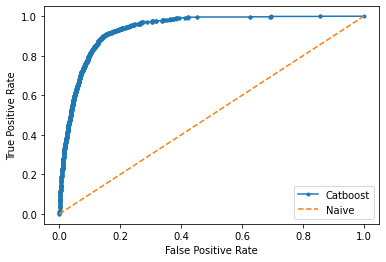

In [70]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

ns_probs = [0 for _ in range(len(y_test))]
            


lr_fpr, lr_tpr,_ = roc_curve(y_test['y_bool'].to_numpy(), preds_proba[:, 1])
            
lr_auc = roc_auc_score(y_test['y_bool'].to_numpy(), preds_proba[:, 1])
print('Logistic: ROC AUC=%.3f' % (lr_auc))
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Catboost')

ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)

pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Naive')

            
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# Feature Importance

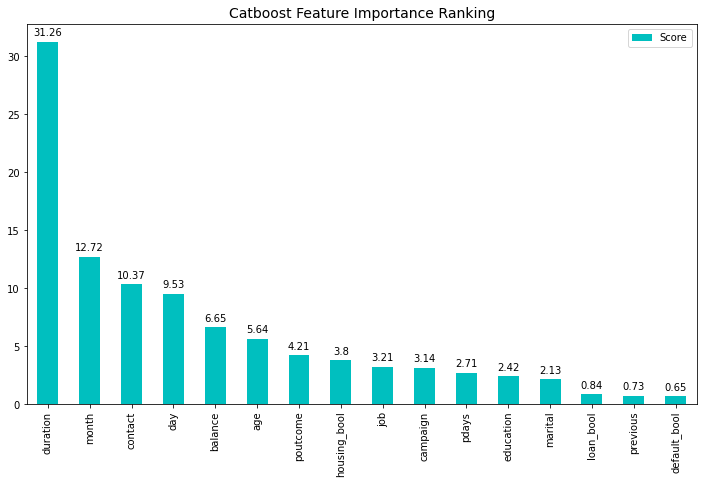

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_score = pd.DataFrame(list(zip(X.dtypes.index, model.get_feature_importance(Pool(X, label=y, cat_features=nominal_features)))),
                columns=['Feature','Score'])

feature_score = feature_score.sort_values(by='Score', ascending=False, inplace=False, kind='quicksort', na_position='last')

plt.rcParams["figure.figsize"] = (12,7)
ax = feature_score.plot('Feature', 'Score', kind='bar', color='c')
ax.set_title("Catboost Feature Importance Ranking", fontsize = 14)
ax.set_xlabel('')

rects = ax.patches

labels = feature_score['Score'].round(2)

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 0.35, label, ha='center', va='bottom')

plt.show()